In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

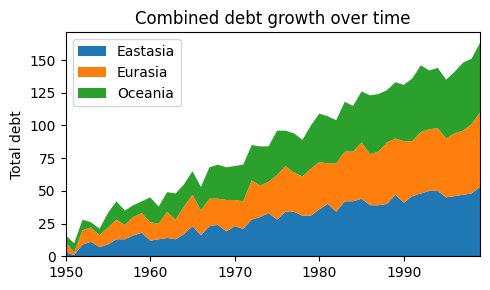

In [8]:
>>> rng = np.arange(50)
>>> rnd = np.random.randint(0, 10, size=(3, rng.size))
>>> yrs = 1950 + rng

>>> fig, ax = plt.subplots(figsize=(5, 3))
>>> ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
>>> ax.set_title('Combined debt growth over time')
>>> ax.legend(loc='upper left')
>>> ax.set_ylabel('Total debt')
>>> ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
>>> fig.tight_layout()

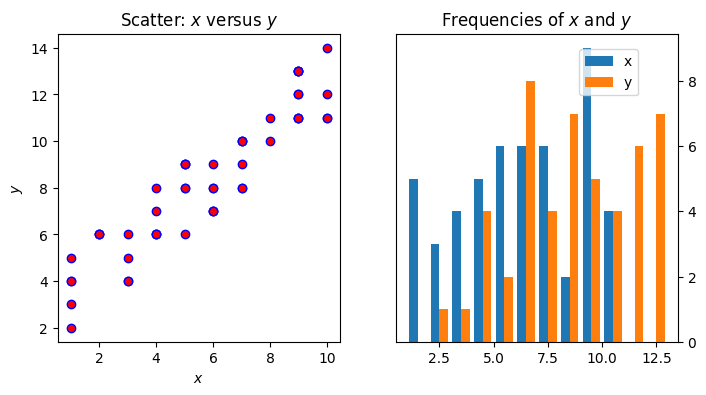

In [9]:
>>> x = np.random.randint(low=1, high=11, size=50)
>>> y = x + np.random.randint(1, 5, size=x.size)
>>> data = np.column_stack((x, y))

>>> fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
...                                figsize=(8, 4))

>>> ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
>>> ax1.set_title('Scatter: $x$ versus $y$')
>>> ax1.set_xlabel('$x$')
>>> ax1.set_ylabel('$y$')

>>> ax2.hist(data, bins=np.arange(data.min(), data.max()),
...          label=('x', 'y'))
>>> ax2.legend(loc=(0.65, 0.8))
>>> ax2.set_title('Frequencies of $x$ and $y$')
>>> ax2.yaxis.tick_right()

### PLOT WITH PANDAS

In [35]:
import pandas as pd

download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/"
     "data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

type(df)

pandas.core.frame.DataFrame

In [36]:
# Configuramos la display.max.columnsopción para asegurar que pandas no oculta ninguna columna

pd.set_option("display.max.columns", None)

df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [41]:
# El %matplotlib comando mágico configura su Jupyter Notebook para mostrar gráficos con Matplotlib

# Podemos cambiar el backend de Matplotlib, por ejemplo el inlinebackend es popular para Jupyter Notebooks porque muestra el gráfico en el propio cuaderno, 
# inmediatamente debajo de la celda que crea el gráfico:
## Ej: 
# 

%matplotlib inline


In [44]:
import matplotlib.pyplot as plt


<Axes: xlabel='Rank'>

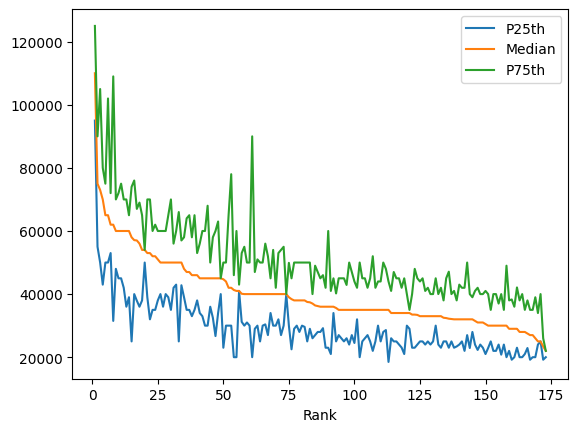

In [42]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

**Interpretación**: 
* El ingreso medio disminuye a medida que aumenta el rango. Esto es de esperarse porque el rango está determinado por el ingreso medio.

* Algunas carreras tienen grandes brechas entre los percentiles 25 y 75. Las personas con estos títulos pueden ganar mucho menos o mucho más que el ingreso medio.

* Otras carreras tienen brechas muy pequeñas entre los percentiles 25 y 75. Las personas con estos títulos ganan salarios muy cercanos al ingreso medio.

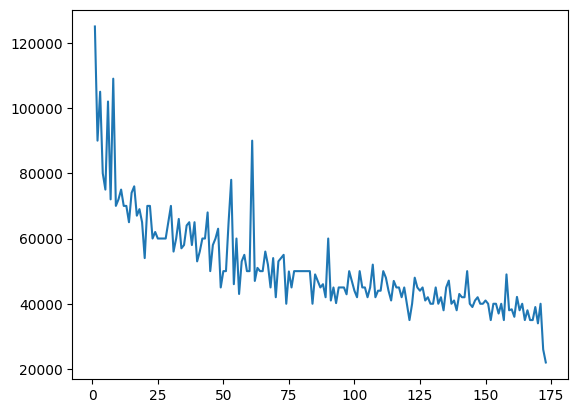

In [45]:
# Gráfico lineal que traza el percentil 75 en el eje y frente al rango en el eje x

import matplotlib.pyplot as plt

plt.plot(df["Rank"], df["P75th"])

<Axes: xlabel='Rank'>

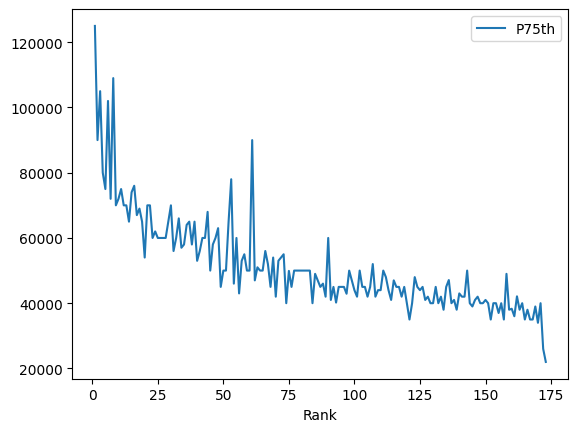

In [46]:
# Mismo gráfico que el anterior pero usando el método plot() del objeto df

df.plot(x= "Rank", y="P75th")

<Axes: ylabel='Frequency'>

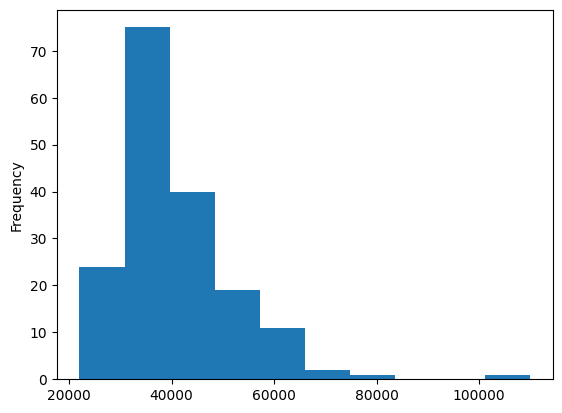

In [48]:
# Histograma de la Mediana

median_column = df["Median"]

median_column.plot(kind="hist")

**Interpretación**:

El histograma muestra los datos agrupados en diez contenedores que van desde $20 000 a $120 000, y cada contenedor tiene un ancho de $10 000. El histograma tiene una forma diferente a la distribución normal , que tiene forma de campana simétrica con un pico en el medio.
El histograma de los datos medianos alcanza su máximo a la izquierda por debajo de 40.000 dólares. La cola se extiende hacia la derecha y sugiere que, efectivamente, hay campos cuyas grandes empresas pueden esperar ganancias significativamente mayores.

<Axes: xlabel='Major'>

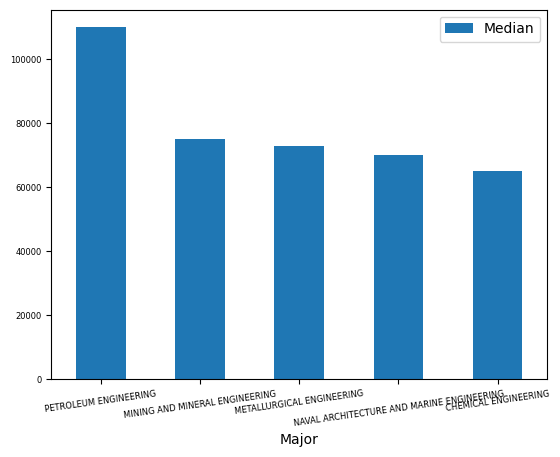

In [57]:
top_5 = df.sort_values(by="Median", ascending=False).head()

top_5.plot(x="Major", y="Median", kind="bar", rot=8, fontsize=6)

**Interpetación:**

Este gráfico muestra que el salario medio de los estudiantes de ingeniería petrolera es más de 20.000 dólares más alto que el del resto. Las ganancias de las especialidades del segundo al cuarto lugar son relativamente cercanas entre sí.


<Axes: xlabel='Major'>

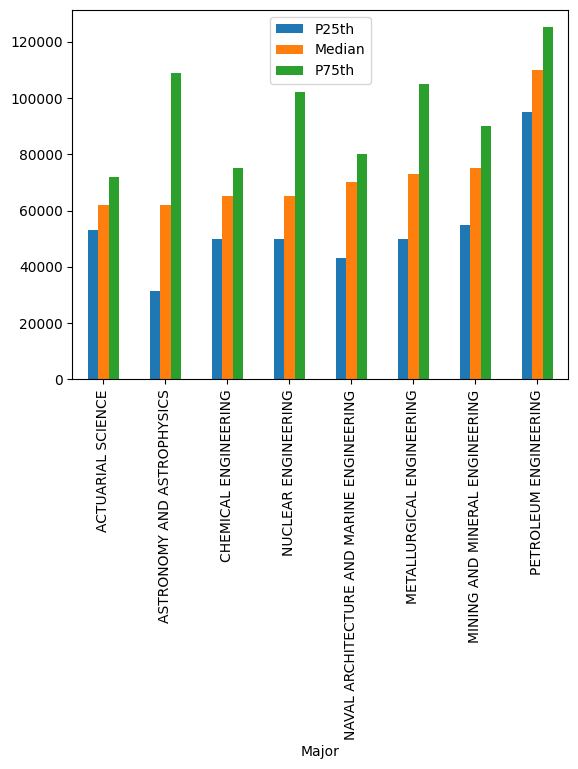

In [58]:
# Investiguemos todas las carreras cuyo salario medio es superior a 60.000 dólares

top_medians = df[df["Median"] > 60000].sort_values("Median")

top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

**Interpretacion:** 

Los percentiles 25 y 75 confirman lo que hemos visto anteriormente: los estudiantes de ingeniería petrolera fueron, con diferencia, los recién graduados mejor pagados.

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

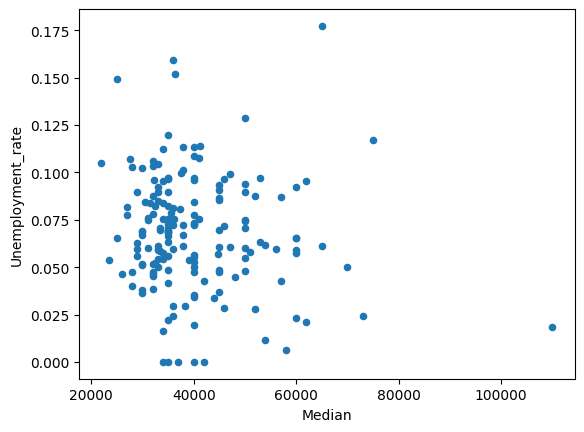

In [60]:
# Indagamos sobre la relacion entre desempleo e ingresos

df.plot(x="Median", y="Unemployment_rate", kind="scatter")

**Interpretacion:** 

Un vistazo rápido a esta cifra muestra que no existe una correlación significativa entre los ingresos y la tasa de desempleo.

In [64]:
df.corr(method="pearson", min_periods=1, numeric_only = True)

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


In [67]:
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [69]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()

cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<Axes: ylabel='Major_category'>

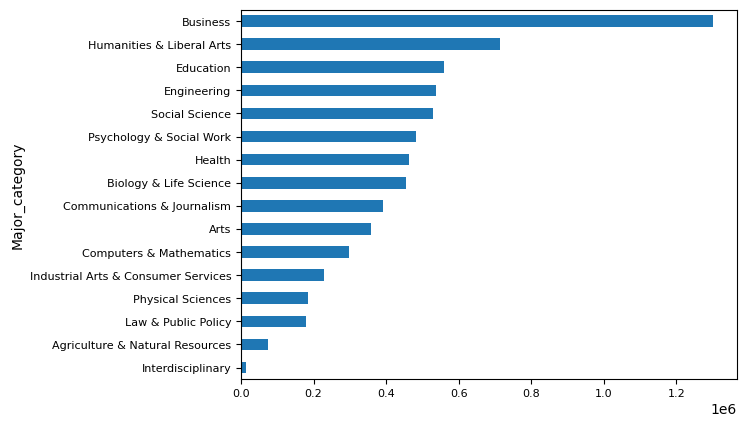

In [71]:
cat_totals.plot(kind="barh", fontsize=8)

**Interpretacion:** Como muestra su trama, los negocios son, con diferencia, la categoría principal más popular. Si bien las humanidades y las artes liberales ocupan el segundo lugar, el resto de los campos son más similares en popularidad.

<Axes: >

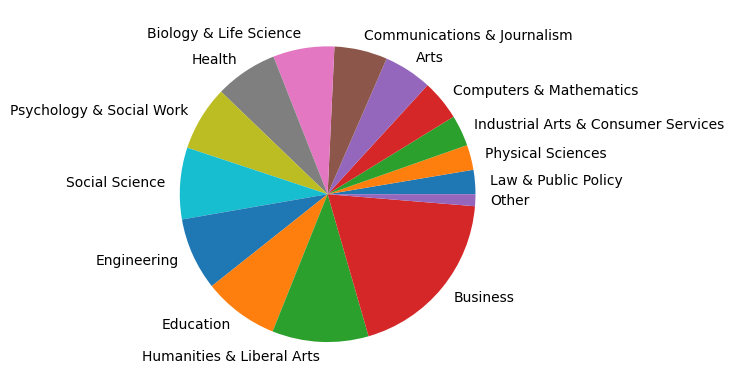

In [78]:
# Queremos crear un grafico de torta, pero como hay categorias muy pequeñas eso no se vera bien, por lo que agrupamoes estas categorias antes de graficar

small_cat_totals = cat_totals[cat_totals < 100_000]

big_cat_totals = cat_totals[cat_totals > 100_000]

# Añadimos un nuevo item llamado "Other" con la suma de las categorias pequeñas

small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

big_cat_totals = pd.concat([big_cat_totals, small_sums])

big_cat_totals.plot(kind="pie", label="")

<Axes: ylabel='Frequency'>

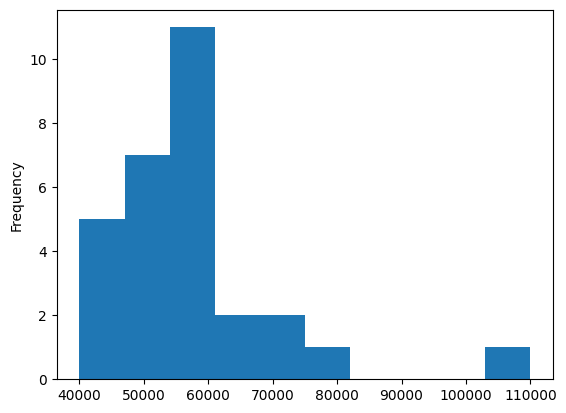

In [79]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")

**Interpretacion:** El rango de las principales ganancias medianas es algo menor, a partir de 40.000 dólares. La distribución es más cercana a la normal, aunque su pico sigue estando a la izquierda. Por lo tanto, incluso si ha decidido elegir una especialización en la categoría de ingeniería, sería prudente profundizar más y analizar sus opciones más a fondo.